In [1]:
cd /Users/karolinegriesbach/Documents/Innkeepr/Git/consumption-based-costs/

/Users/karolinegriesbach/Documents/Innkeepr/Git/consumption-based-costs


/Users/karolinegriesbach/.local/share/virtualenvs/consumption-based-costs-wGvc2ut4/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from src.utils.cost_handling import return_cost_per_run
from src.utils.accounts import sanitize_account_name


# Categorize Costs
- Use grouping to categorize costs

In [3]:
from_date = "2024-01-01"
to_date="2025-06-23"
timestamp = "2025-06-23 13:23:56.520433"
path_to_dir_targeting = f"/Users/karolinegriesbach/Documents/Innkeepr/Git/consumption-based-costs/data/{from_date}_to_{to_date}/targeting_and_retraining/"
path_to_targeting_date = f"{path_to_dir_targeting}map_nodes_to_prefect_runs_{from_date}_{to_date}.csv"
path_to_save = f"/Users/karolinegriesbach/Documents/Innkeepr/Git/consumption-based-costs/data/{from_date}_to_{to_date}/costs/"
file_costs = f"final_targeting_costs_{from_date}_{to_date}.csv"
targeting_runs = ["targeting","googleConversionUpdate"]
path_to_figures = f"/Users/karolinegriesbach/Documents/Innkeepr/Git/consumption-based-costs/analysis/figures/{from_date}_to_{to_date}/{timestamp}/targeting_costs/"

In [4]:
os.makedirs(path_to_save, exist_ok=True)
os.makedirs(path_to_figures, exist_ok=True)

# Load Data

In [5]:
# loading targeting costs mapping (generated via analysis/3_cost_targeting.ipynb)
df_targeting = pd.read_csv(path_to_targeting_date)
df_targeting = df_targeting[[col for col in df_targeting.columns if "Unnamed" not in col]]
df_targeting.shape

(11088, 58)

In [6]:
# get cost per run
df_targeting = return_cost_per_run(df_targeting)
df_targeting = df_targeting.sort_values(by=["date","serviceName"])
df_targeting = df_targeting[["date","cloud","Prefect_Deployments","serviceName","tenant","audience","audience_id","duration","sum_duration_serviceName","total_charge_of_serviceName","part_of_costs_per_run","cost_per_run","targetingOutlookDays"]]

In [7]:
vc = df_targeting.groupby(by=["date","serviceName"])["part_of_costs_per_run"].sum()
vc_all = vc.reset_index()
vc = vc_all[vc_all["part_of_costs_per_run"].round()!=1]
vc = vc[vc["serviceName"]!="General Purpose Server-g1.3-EU01"] # is used for agentpools as well, so can be != 1
if len(vc) > 0:
    raise ValueError(f"Some the costs does not match the sum: {vc}")

In [12]:
df_targeting = df_targeting[df_targeting["Prefect_Deployments"].isin(["targeting","googleConversionUpdate"])]
df_targeting = df_targeting.reset_index(drop=True)
df_targeting["month"] = pd.to_datetime(df_targeting["date"], format="mixed").dt.to_period("M")
df_targeting["month"] = df_targeting["month"].astype("str")
df_targeting

,date,cloud,Prefect_Deployments,serviceName,tenant,audience,audience_id,duration,sum_duration_serviceName,total_charge_of_serviceName,part_of_costs_per_run,cost_per_run,targetingOutlookDays,month
0,2025-02-10,stackit,targeting,Compute Optimized Server-c1.3-EU01,ective,654199d5c55281d53441fdf2,654199d5c55281d53441fdf2,361.781920,18877.987376,4.550782,0.019164,0.087212,180.0,2025-02
1,2025-02-10,stackit,targeting,Compute Optimized Server-c1.3-EU01,ective,6577083242f53bead377ecc7,6577083242f53bead377ecc7,362.026280,18877.987376,4.550782,0.019177,0.087271,180.0,2025-02
2,2025-02-10,stackit,targeting,Compute Optimized Server-c1.3-EU01,ective,NaN,65cc9da1c30012384b62270e,363.056150,18877.987376,4.550782,0.019232,0.087519,180.0,2025-02
3,2025-02-10,stackit,targeting,Compute Optimized Server-c1.3-EU01,pendix,65dde29ef4f24f03238ac989,65dde29ef4f24f03238ac989,121.798780,18877.987376,4.550782,0.006452,0.029361,60.0,2025-02
4,2025-02-10,stackit,targeting,Compute Optimized Server-c1.3-EU01,vioneers,6392fae63ceef43bf3448b98,6392fae63ceef43bf3448b98,61.574318,18877.987376,4.550782,0.003262,0.014843,720.0,2025-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6173,2025-06-23,NaN,targeting,NaN,rosental,68302cd3ef02595b6bea4be9,68302cd3ef02595b6bea4be9,60.289170,NaN,NaN,NaN,NaN,730.0,2025-06
6174,2025-06-23,NaN,targeting,NaN,rosental,NaN,68518c34a93b88d67a15d001,1861.327600,NaN,NaN,NaN,NaN,90.0,2025-06
6175,2025-06-23,NaN,targeting,NaN,rosental,NaN,68518c55a93b88d67a15d3d6,360.377140,NaN,NaN,NaN,NaN,90.0,2025-06
6176,2025-06-23,NaN,targeting,NaN,rosental,NaN,68518c65a93b88d67a15d581,1861.660800,NaN,NaN,NaN,NaN,90.0,2025-06


In [9]:
df_targeting["Prefect_Deployments"].value_counts(dropna=False)

Prefect_Deployments
targeting                 6058
googleConversionUpdate     120
Name: count, dtype: int64

In [14]:
with open(f"data/infrastructure_insights/customer_buckets.json") as f:
    customer_buckets = json.load(f)
df_targeting["customer_bucket"] = None
for customer_bucket in customer_buckets.keys():
    consider_accounts = customer_buckets[customer_bucket]["accounts"]
    consider_accounts = [sanitize_account_name(account) for account in consider_accounts]
    df_targeting["customer_bucket"] = np.where(df_targeting["tenant"].isin(consider_accounts),customer_bucket,df_targeting["customer_bucket"])
df_targeting.groupby("customer_bucket")["tenant"].unique()

customer_bucket
huge                                              [asambeauty]
large                    [rosental, paulvalentine, kfzteile24]
medium            [autobatterienbilliger, junglueck, lillydoo]
small         [ective, nikin, junoandme, beautymates, toteach]
very_small                                  [pendix, vioneers]
Name: tenant, dtype: object

In [10]:
df_targeting.to_csv(f"{path_to_save}{file_costs}",index=False)

# Cost per Customer and Day

In [26]:
path_to_figures_customer = f"{path_to_figures}costs_per_customer/"
os.makedirs(path_to_figures_customer, exist_ok=True)

In [83]:
costs_per_customer = df_targeting.groupby(by=["date","tenant"])["cost_per_run"].sum().reset_index().rename(columns={"cost_per_run":"sum_of_costs"})
count_audiences = df_targeting.groupby(by=["date","tenant"])["audience_id"].nunique().reset_index().rename(columns={"audience_id":"count_audiences"})
costs_per_customer = pd.merge(costs_per_customer,count_audiences,how="left",on=["date","tenant"])
costs_per_customer.sort_values(by=["tenant","date"])

,date,tenant,sum_of_costs,count_audiences
0,2025-02-10,asambeauty,41.630892,19
10,2025-02-11,asambeauty,0.903903,2
18,2025-02-12,asambeauty,13.122362,2
27,2025-02-13,asambeauty,36.221169,19
37,2025-02-14,asambeauty,25.857969,4
...,...,...,...,...
930,2025-06-10,vioneers,0.012861,2
960,2025-06-13,vioneers,0.079318,2
990,2025-06-16,vioneers,0.041972,2
1022,2025-06-19,vioneers,0.070192,2


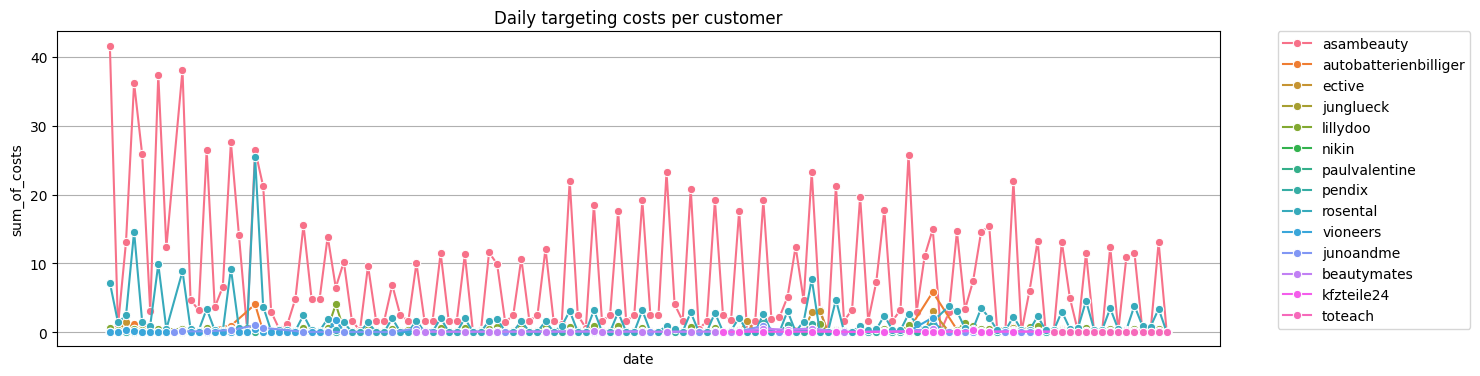

In [84]:
fig = plt.figure(figsize=(15,9))
ax1 = fig.add_subplot(2,1,1)
ax1.set_title("Daily targeting costs per customer")
sns.lineplot(data=costs_per_customer,x="date",y="sum_of_costs",hue="tenant", marker="o", ax=ax1)
plt.grid(True)
plt.xticks([])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.savefig(f"{path_to_figures_customer}cost_per_customer_and_day.png",bbox_inches='tight',dpi=300)

In [85]:
for customer in costs_per_customer["tenant"].unique():
    costs_per_customer_plot = costs_per_customer[costs_per_customer["tenant"] == customer]
    fig = plt.figure(figsize=(15,5))
    plt.suptitle(customer)
    ax1 = fig.add_subplot(2,1,1)
    ax1.set_title("Daily targeting costs per customer")
    sns.lineplot(data=costs_per_customer_plot,x="date",y="sum_of_costs",hue="tenant", marker="o", ax=ax1)
    plt.grid(True)
    plt.xticks([])
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    ax2 = fig.add_subplot(2,1,2)
    ax2.set_title("Daily # audiences per customer")
    sns.lineplot(data=costs_per_customer_plot,x="date",y="count_audiences",hue="tenant", marker="o",ax=ax2)
    plt.grid(True)
    plt.xticks(rotation=90)
    ax2.get_legend().remove()
    plt.tight_layout()
    fig.savefig(f"{path_to_figures_customer}cost_per_customer_and_day_{customer}.png",bbox_inches='tight',dpi=300)
    fig.clf()
    plt.clf()
    break

<Figure size 1500x500 with 0 Axes>

In [86]:
costs_per_customer_stats = costs_per_customer.groupby(by=["tenant"])["sum_of_costs"].describe().reset_index().sort_values(by="mean", ascending=False).reset_index(drop=True)
costs_per_customer_stats.to_csv(f"{path_to_save}cost_per_customer_date_stats.csv",index=False)
costs_per_customer_stats

,tenant,count,mean,std,min,25%,50%,75%,max
0,asambeauty,131.0,8.389056,9.294248,0.000000,1.632891,3.593694,13.112444,41.630892
1,rosental,129.0,1.623510,3.074408,0.000000,0.076089,0.391802,2.118726,25.473660
2,autobatterienbilliger,53.0,0.439023,0.940549,0.003162,0.145765,0.219646,0.312222,5.815903
3,lillydoo,128.0,0.360986,0.447463,0.000000,0.098809,0.188229,0.502246,4.040400
4,ective,130.0,0.206444,0.524209,0.000000,0.024511,0.065405,0.126874,3.097569
5,junglueck,80.0,0.147137,0.143035,0.000000,0.021602,0.170063,0.218100,0.768864
6,junoandme,60.0,0.134204,0.202290,0.000000,0.025609,0.082544,0.106321,0.985437
7,vioneers,65.0,0.121097,0.343820,0.004488,0.015253,0.032217,0.070192,2.120214
8,beautymates,37.0,0.103409,0.122494,0.013928,0.053361,0.068857,0.075236,0.498551
9,pendix,130.0,0.080156,0.209023,0.000000,0.021327,0.025434,0.064184,1.274968


In [87]:
costs_per_customer_stats[["tenant","mean","std"]].round(2)

,tenant,mean,std
0,asambeauty,8.39,9.29
1,rosental,1.62,3.07
2,autobatterienbilliger,0.44,0.94
3,lillydoo,0.36,0.45
4,ective,0.21,0.52
5,junglueck,0.15,0.14
6,junoandme,0.13,0.20
7,vioneers,0.12,0.34
8,beautymates,0.10,0.12
9,pendix,0.08,0.21


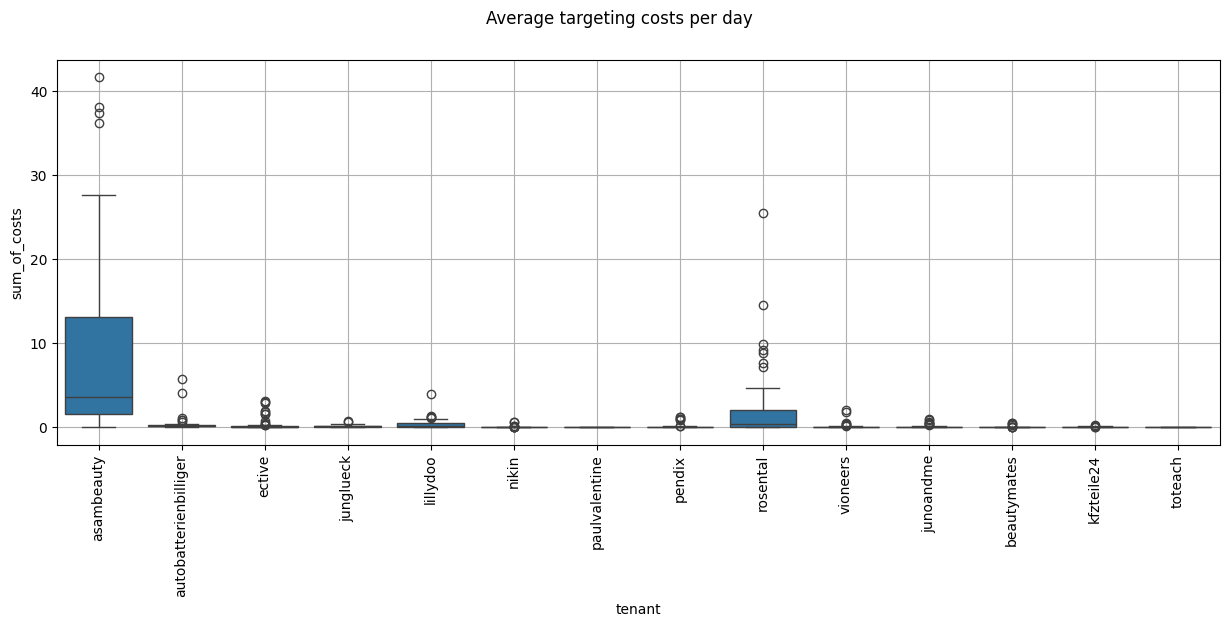

In [88]:
fig = plt.figure(figsize=(15, 5))
fig.suptitle("Average targeting costs per day")
sns.boxplot(data=costs_per_customer, x="tenant", y="sum_of_costs")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()
fig.savefig(f"{path_to_figures_customer}cost_per_customer_boxplot.png",bbox_inches='tight',dpi=300)

# Cost per Customer and Month

In [ ]:
df_targeting

,date,cloud,Prefect_Deployments,serviceName,tenant,audience,audience_id,duration,sum_duration_serviceName,total_charge_of_serviceName,part_of_costs_per_run,cost_per_run,targetingOutlookDays,month
0,2025-02-10,stackit,targeting,Compute Optimized Server-c1.3-EU01,ective,654199d5c55281d53441fdf2,654199d5c55281d53441fdf2,361.781920,18877.987376,4.550782,0.019164,0.087212,180.0,2025-02
1,2025-02-10,stackit,targeting,Compute Optimized Server-c1.3-EU01,ective,6577083242f53bead377ecc7,6577083242f53bead377ecc7,362.026280,18877.987376,4.550782,0.019177,0.087271,180.0,2025-02
2,2025-02-10,stackit,targeting,Compute Optimized Server-c1.3-EU01,ective,NaN,65cc9da1c30012384b62270e,363.056150,18877.987376,4.550782,0.019232,0.087519,180.0,2025-02
3,2025-02-10,stackit,targeting,Compute Optimized Server-c1.3-EU01,pendix,65dde29ef4f24f03238ac989,65dde29ef4f24f03238ac989,121.798780,18877.987376,4.550782,0.006452,0.029361,60.0,2025-02
4,2025-02-10,stackit,targeting,Compute Optimized Server-c1.3-EU01,vioneers,6392fae63ceef43bf3448b98,6392fae63ceef43bf3448b98,61.574318,18877.987376,4.550782,0.003262,0.014843,720.0,2025-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6173,2025-06-23,NaN,targeting,NaN,rosental,68302cd3ef02595b6bea4be9,68302cd3ef02595b6bea4be9,60.289170,NaN,NaN,NaN,NaN,730.0,2025-06
6174,2025-06-23,NaN,targeting,NaN,rosental,NaN,68518c34a93b88d67a15d001,1861.327600,NaN,NaN,NaN,NaN,90.0,2025-06
6175,2025-06-23,NaN,targeting,NaN,rosental,NaN,68518c55a93b88d67a15d3d6,360.377140,NaN,NaN,NaN,NaN,90.0,2025-06
6176,2025-06-23,NaN,targeting,NaN,rosental,NaN,68518c65a93b88d67a15d581,1861.660800,NaN,NaN,NaN,NaN,90.0,2025-06


In [90]:
costs_per_customer_month = df_targeting.groupby(by=["tenant","month"])["cost_per_run"].sum().reset_index().rename(columns={"cost_per_run":"sum_of_costs"})
costs_per_customer_month["sum_of_costs"] = costs_per_customer_month["sum_of_costs"].round(2)
costs_per_customer_month["month"] = costs_per_customer_month["month"].astype("str")
costs_per_customer_month

,tenant,month,sum_of_costs
0,asambeauty,2025-02,321.86
1,asambeauty,2025-03,163.49
2,asambeauty,2025-04,212.04
3,asambeauty,2025-05,266.38
4,asambeauty,2025-06,135.20
5,autobatterienbilliger,2025-02,7.67
6,autobatterienbilliger,2025-03,1.29
7,autobatterienbilliger,2025-04,2.35
8,autobatterienbilliger,2025-05,9.20
9,autobatterienbilliger,2025-06,2.77


In [91]:
costs_per_customer_month_stats = costs_per_customer_month.groupby(by=["tenant"])["sum_of_costs"].describe().reset_index().sort_values(by="mean", ascending=False).reset_index(drop=True)
costs_per_customer_month_stats

,tenant,count,mean,std,min,25%,50%,75%,max
0,asambeauty,5.0,219.7940,75.786103,135.20,163.490,212.04,266.3800,321.86
1,rosental,5.0,41.8860,26.404596,22.45,26.610,30.71,42.4700,87.19
2,lillydoo,5.0,9.2420,2.446348,5.70,7.810,10.10,11.0400,11.56
3,ective,5.0,5.3680,5.249654,1.86,2.070,3.19,5.2800,14.44
4,autobatterienbilliger,5.0,4.6560,3.533296,1.29,2.350,2.77,7.6700,9.20
5,junglueck,5.0,2.3540,0.404944,1.84,2.120,2.44,2.4500,2.92
6,pendix,5.0,2.0840,1.951622,0.87,1.140,1.23,1.6400,5.54
7,junoandme,5.0,1.6120,0.834248,0.91,1.040,1.52,1.5800,3.01
8,vioneers,5.0,1.5740,1.285547,0.28,0.430,1.65,2.1100,3.40
9,beautymates,4.0,0.9575,0.902159,0.22,0.505,0.67,1.1225,2.27


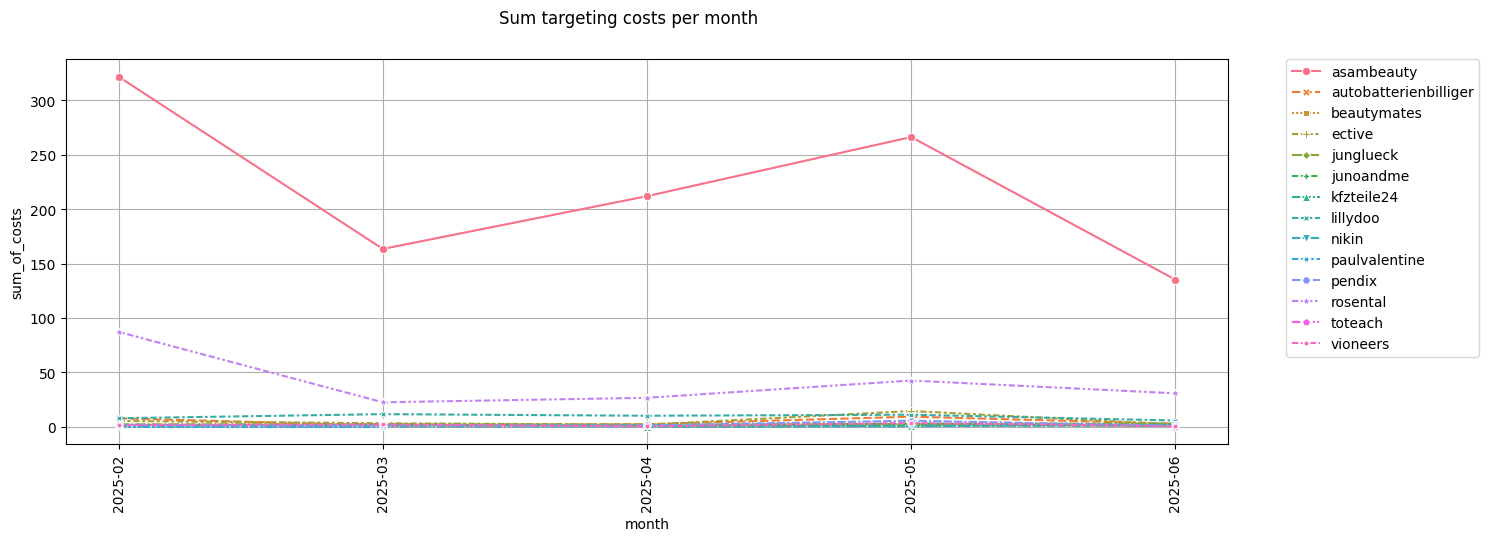

In [92]:
fig = plt.figure(figsize=(15, 5))
fig.suptitle("Sum targeting costs per month")
# sns.lineplot(data=costs_per_customer_month, x="month", y="sum_of_costs", hue="tenant")
sns.lineplot(data=costs_per_customer_month, x="month", y="sum_of_costs", hue="tenant", style="tenant", markers=True)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)
plt.show()
fig.savefig(f"{path_to_figures_customer}cost_per_customer_per_month.png",bbox_inches='tight',dpi=300)

# Cost per Customer and Month per Audience

In [93]:
count_audiences_per_month = df_targeting.groupby(by=["tenant","month"])["audience_id"].nunique().reset_index().rename(columns={"audience_id":"count_audiences"})
count_audiences_per_month["month"] = count_audiences_per_month["month"].astype("str")
count_audiences_per_month = pd.merge(costs_per_customer_month,count_audiences_per_month,how="left",on=["tenant","month"])
count_audiences_per_month["cost_per_audience (month)"] = (count_audiences_per_month["sum_of_costs"]/count_audiences_per_month["count_audiences"]).round(2)
count_audiences_per_month

,tenant,month,sum_of_costs,count_audiences,cost_per_audience (month)
0,asambeauty,2025-02,321.86,21,15.33
1,asambeauty,2025-03,163.49,18,9.08
2,asambeauty,2025-04,212.04,15,14.14
3,asambeauty,2025-05,266.38,14,19.03
4,asambeauty,2025-06,135.20,14,9.66
5,autobatterienbilliger,2025-02,7.67,10,0.77
6,autobatterienbilliger,2025-03,1.29,10,0.13
7,autobatterienbilliger,2025-04,2.35,10,0.24
8,autobatterienbilliger,2025-05,9.20,10,0.92
9,autobatterienbilliger,2025-06,2.77,10,0.28


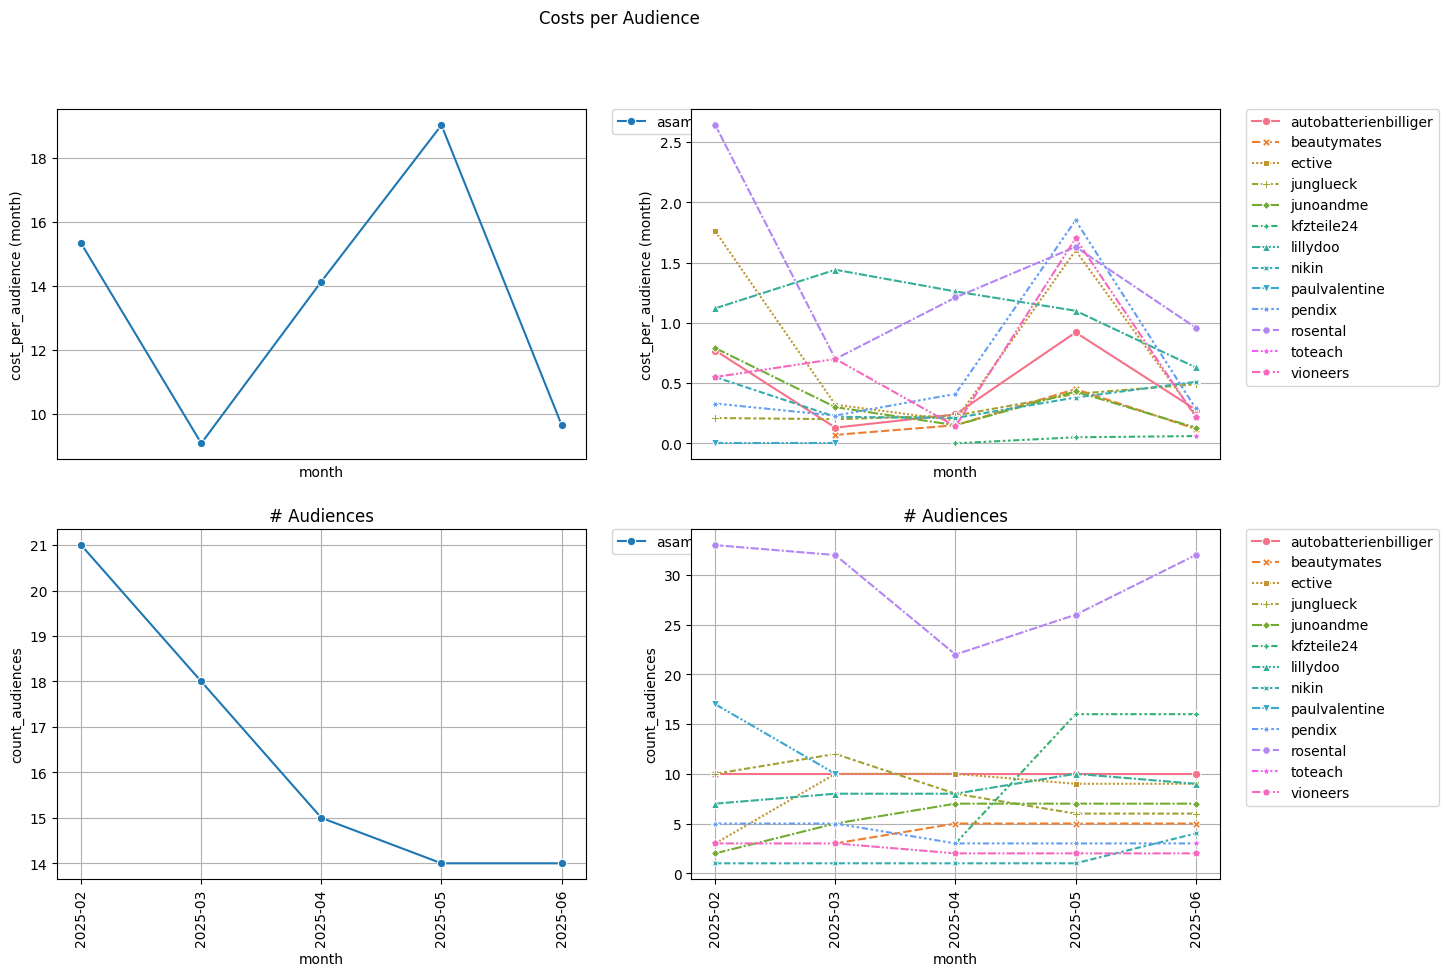

<Figure size 640x480 with 0 Axes>

In [94]:
min_y_threshold = 5
max_y_threshold = 9
fig = plt.figure(figsize=(15, 10))
fig.suptitle("Costs per Audience")
ax = fig.add_subplot(2,2,1)
sns.lineplot(data=count_audiences_per_month[count_audiences_per_month["cost_per_audience (month)"]>max_y_threshold], x="month", y="cost_per_audience (month)", hue="tenant", style="tenant", markers=True, ax=ax)
plt.xticks([])
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax3 = fig.add_subplot(2,2,3)
ax3.set_title("# Audiences")
sns.lineplot(data=count_audiences_per_month[count_audiences_per_month["cost_per_audience (month)"]>max_y_threshold], x="month", y="count_audiences", hue="tenant", style="tenant", markers=True, ax=ax3)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)
plt.xticks(rotation=90)

ax2 = fig.add_subplot(2,2,2)
sns.lineplot(data=count_audiences_per_month[count_audiences_per_month["cost_per_audience (month)"]<=max_y_threshold], x="month", y="cost_per_audience (month)", hue="tenant", style="tenant", markers=True, ax=ax2)
plt.xticks([])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)

ax3 = fig.add_subplot(2,2,4)
ax3.set_title("# Audiences")
sns.lineplot(data=count_audiences_per_month[count_audiences_per_month["cost_per_audience (month)"]<=max_y_threshold], x="month", y="count_audiences", hue="tenant", style="tenant", markers=True, ax=ax3)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)
plt.xticks(rotation=90)

plt.show()
plt.tight_layout()
fig.savefig(f"{path_to_figures_customer}count_audiences_per_month.png",bbox_inches='tight',dpi=300)

In [95]:
total_cost_per_audience_per_month = df_targeting.groupby(by="month")["cost_per_run"].sum().reset_index().rename(columns={"cost_per_run":"sum_of_costs"})
total_audiences_per_month = df_targeting.groupby(by="month")["audience_id"].nunique().reset_index().rename(columns={"audience_id":"count_audiences"})
total_cost_per_audience_per_month["month"] = total_cost_per_audience_per_month["month"].astype("str")
total_audiences_per_month["month"] = total_audiences_per_month["month"].astype("str")
total_cost_per_audience_per_month = pd.merge(total_cost_per_audience_per_month,total_audiences_per_month,how="left",on=["month"])
total_cost_per_audience_per_month["cost_per_audience (month)"] = (total_cost_per_audience_per_month["sum_of_costs"]/total_cost_per_audience_per_month["count_audiences"]).round(2)

total_cost_per_audience_per_month

,month,sum_of_costs,count_audiences,cost_per_audience (month)
0,2025-02,437.344515,112,3.90
1,2025-03,209.624733,117,1.79
2,2025-04,258.303770,94,2.75
3,2025-05,361.439528,109,3.32
4,2025-06,185.368850,120,1.54


# Cost per Customer Categorization

In [98]:
cost_per_audience_month_customer_size = df_targeting.groupby(by=["month","customer_bucket"])["cost_per_run"].sum().reset_index().rename(columns={"cost_per_run":"sum_of_costs"})
count_audiences_per_month_customer_size = df_targeting.groupby(by=["month","customer_bucket"])["audience_id"].nunique().reset_index().rename(columns={"audience_id":"count_audiences"})
cost_per_audience_month_customer_size = pd.merge(cost_per_audience_month_customer_size,count_audiences_per_month_customer_size,how="left",on=["month","customer_bucket"])
cost_per_audience_month_customer_size["cost_per_audience (month)"] = (cost_per_audience_month_customer_size["sum_of_costs"]/cost_per_audience_month_customer_size["count_audiences"]).round(2)
cost_per_audience_month_customer_size.sort_values(by=["customer_bucket","month"])
cost_per_audience_month_customer_size

,month,customer_bucket,sum_of_costs,count_audiences,cost_per_audience (month)
0,2025-02,huge,321.857286,21,15.33
1,2025-02,large,87.193606,50,1.74
2,2025-02,medium,17.593796,27,0.65
3,2025-02,small,7.410937,6,1.24
4,2025-02,very_small,3.288889,8,0.41
5,2025-03,huge,163.490470,18,9.08
6,2025-03,large,22.445808,42,0.53
7,2025-03,medium,15.285200,30,0.51
8,2025-03,small,5.151745,19,0.27
9,2025-03,very_small,3.251511,8,0.41


In [108]:
pivot_costs_per_audience = cost_per_audience_month_customer_size.pivot(index='month', columns='customer_bucket', values='cost_per_audience (month)')
pivot_costs_per_audience.to_csv(f"{path_to_save}cost_per_audience_by_customer_category.csv")
pivot_costs_per_audience

customer_bucket,huge,large,medium,small,very_small
month,,,,,
2025-02,15.33,1.74,0.65,1.24,0.41
2025-03,9.08,0.53,0.51,0.27,0.41
2025-04,14.14,1.06,0.55,0.17,0.30
2025-05,19.03,1.03,0.87,0.91,1.79
2025-06,9.66,0.66,0.46,0.21,0.26


# Cost per Customer Catgorization & Outlook

In [ ]:
cost_per_audience_month_customer_size_outlook = df_targeting.groupby(by=["month","customer_bucket","targetingOutlookDays"])["cost_per_run"].sum().reset_index().rename(columns={"cost_per_run":"sum_of_costs"})
count_audiences_per_month_customer_size_outlook = df_targeting.groupby(by=["month","customer_bucket","targetingOutlookDays"])["audience_id"].nunique().reset_index().rename(columns={"audience_id":"count_audiences"})
cost_per_audience_month_customer_size_outlook = pd.merge(cost_per_audience_month_customer_size_outlook,count_audiences_per_month_customer_size_outlook,how="left",on=["month","customer_bucket","targetingOutlookDays"])
cost_per_audience_month_customer_size_outlook["cost_per_audience (month)"] = (cost_per_audience_month_customer_size_outlook["sum_of_costs"]/cost_per_audience_month_customer_size_outlook["count_audiences"]).round(2)
cost_per_audience_month_customer_size_outlook = cost_per_audience_month_customer_size_outlook.sort_values(by=["customer_bucket","month","cost_per_audience (month)"])
cost_per_audience_month_customer_size_outlook.to_csv(f"{path_to_save}cost_per_audience_by_customer_category_outlook.csv")

,month,customer_bucket,targetingOutlookDays,sum_of_costs,count_audiences,cost_per_audience (month)
2,2025-02,huge,60.0,0.000000,2,0.00
1,2025-02,huge,30.0,13.848780,8,1.73
0,2025-02,huge,23.0,7.717994,4,1.93
4,2025-02,huge,180.0,3.692974,1,3.69
3,2025-02,huge,90.0,296.597538,6,49.43
...,...,...,...,...,...,...
85,2025-05,very_small,720.0,3.400309,2,1.70
83,2025-05,very_small,60.0,4.811489,1,4.81
104,2025-06,very_small,60.0,0.205148,1,0.21
106,2025-06,very_small,720.0,0.434655,2,0.22


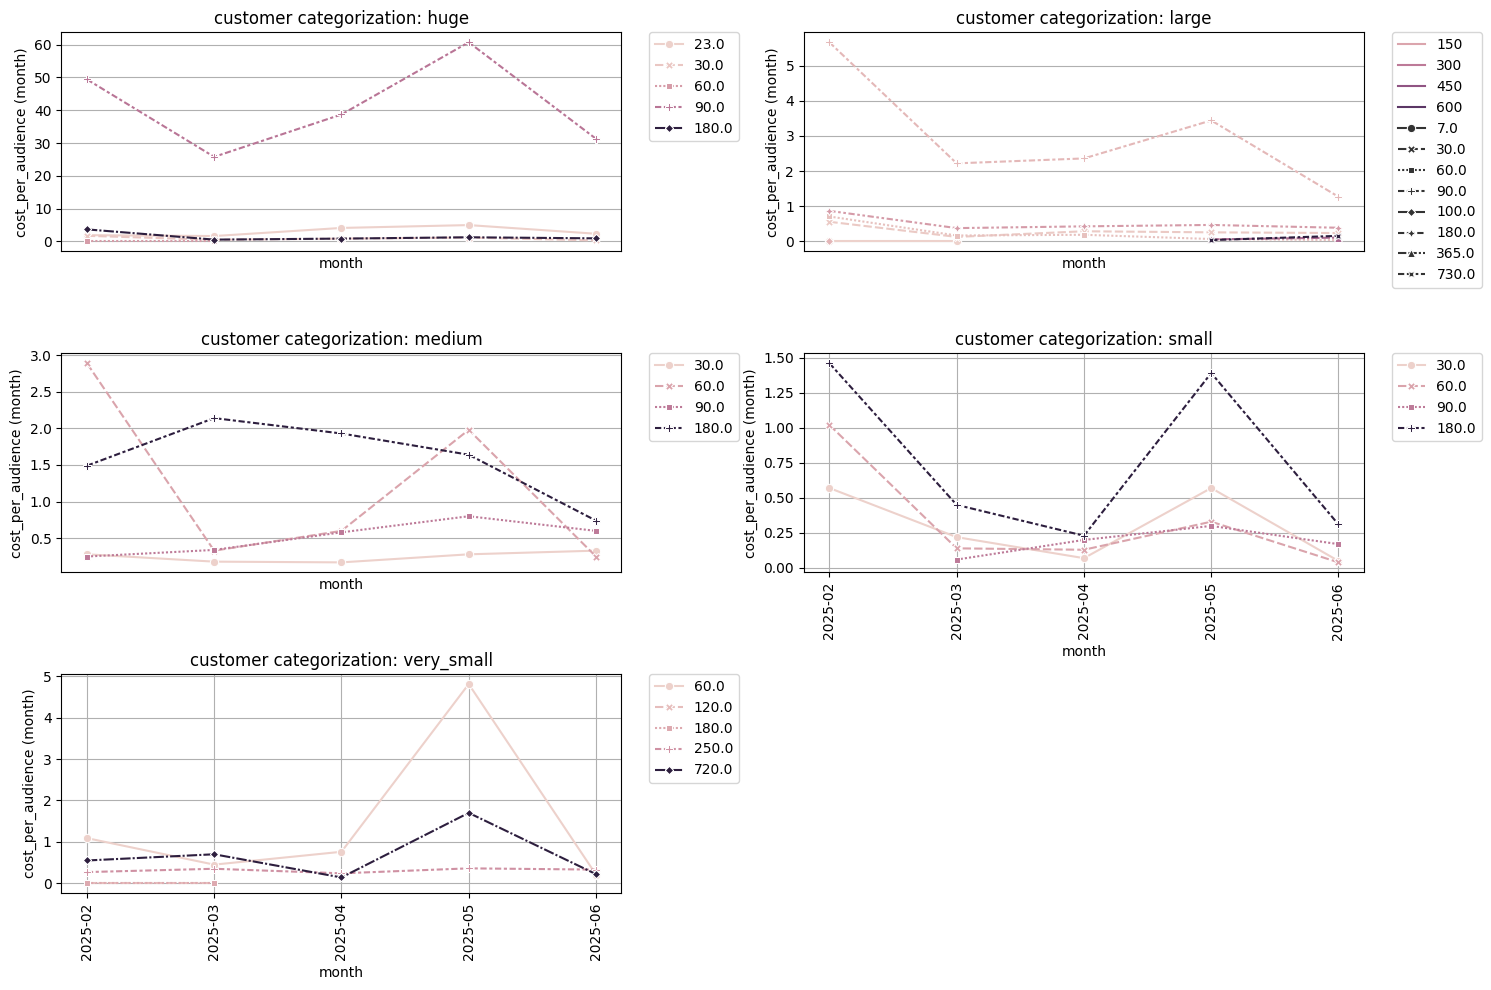

In [35]:
nr_plots = len(cost_per_audience_month_customer_size_outlook["customer_bucket"].unique())
nr_subplots = int(nr_plots/2)
fig = plt.figure(figsize=(15,10))
for iplot, customer_bucket in enumerate(cost_per_audience_month_customer_size_outlook["customer_bucket"].unique()):
    temp_plot = cost_per_audience_month_customer_size_outlook[cost_per_audience_month_customer_size_outlook["customer_bucket"] == customer_bucket]
    ax = fig.add_subplot(3,nr_subplots,iplot+1)
    ax.set_title(f"customer categorization: {customer_bucket}")
    sns.lineplot(data=temp_plot, x="month", y="cost_per_audience (month)", hue="targetingOutlookDays", style="targetingOutlookDays", markers=True, ax=ax)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.grid(True)
    if iplot+1 in [4,5]:
        plt.xticks(rotation=90)
    # if iplot+1 % 2 == 0:
    #     plt.xticks(rotation=90)
    else:
        plt.xticks([])
plt.xticks(rotation=90)
plt.tight_layout()
fig.savefig(f"{path_to_figures}cost_per_audience_month_outlook_{customer_bucket}.png",bbox_inches='tight',dpi=300)
plt.show()
